In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

In [ ]:
import zipfile

local_zip = '/content/horse-or-human.zip'
zipfile = zipfile.ZipFile(local_zip, 'r')
zipfile.extractall('Data')
zipfile.close()

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio('/content/Data', 'data')

Copying files: 1027 files [00:00, 4091.71 files/s]


In [ ]:
import shutil
shutil.rmtree('/content/Data')

In [ ]:
import matplotlib.pyplot as plt
import os

In [ ]:
horses = os.listdir('/content/data/test/horses')
humans = os.listdir('/content/data/test/humans')


In [ ]:
def show_images(n_rows_clos, list_images, main_dir='data', figsize=(16, 8), title=None, labels=None) -> None :

  fig, ax = plt.subplots(ncols=n_rows_clos, nrows=n_rows_clos, figsize=figsize)
  if title != None:
    fig.suptitle(title)
  plot_im = list_images.copy()
  for i in range(n_rows_clos):

    for n in range(n_rows_clos):

      img = plt.imread(os.path.join(main_dir, plot_im[n]))
      plot_im.remove(plot_im[n])


      ax[i][n].imshow(img)
      ax[i][n].axis('off')
      if labels != None:
        ax[i][n].set_title(labels[n])
        labels.remove(labels[n])

  plt.show()

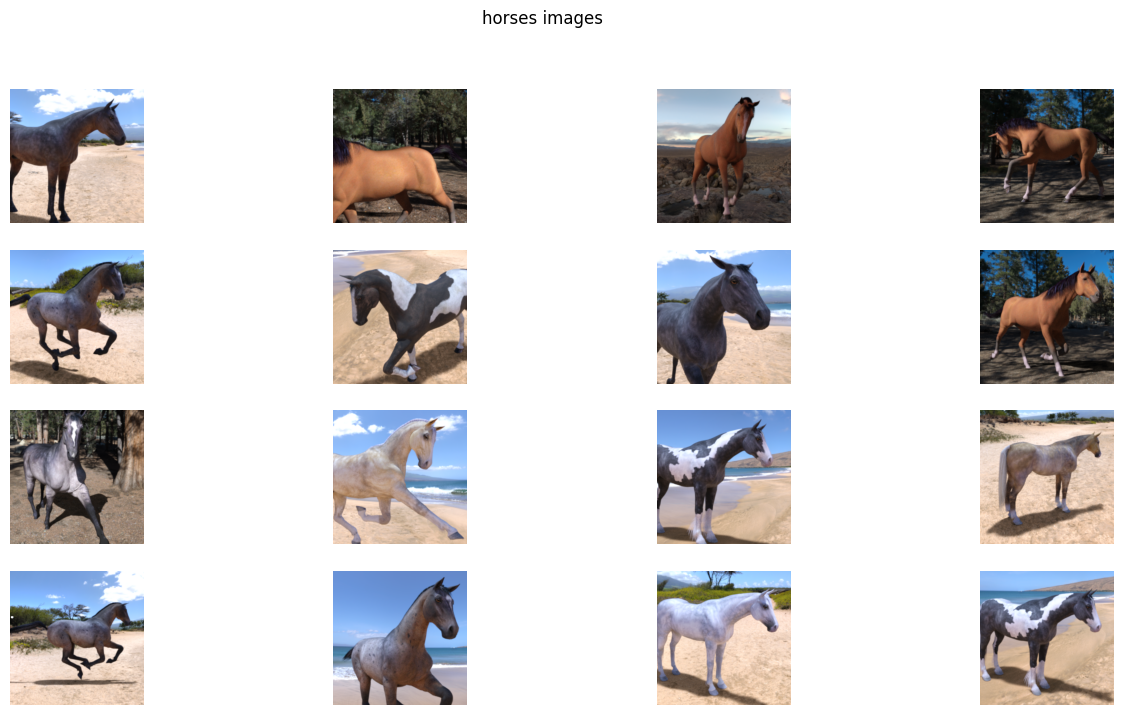

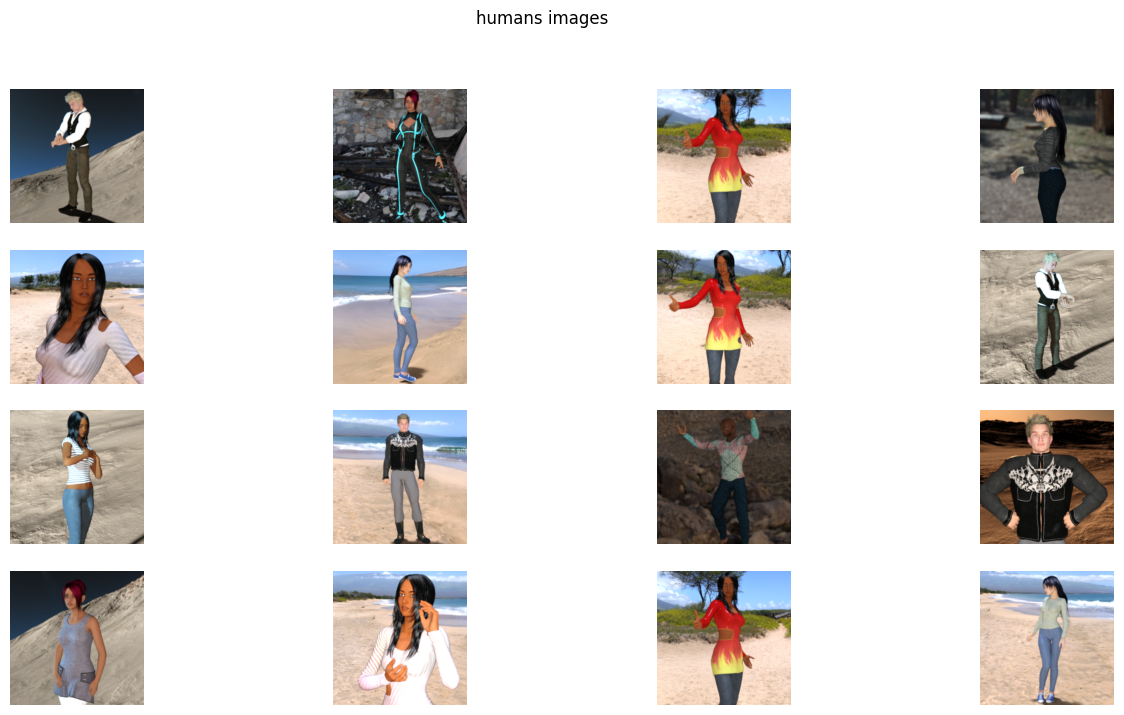

In [ ]:
show_images(4, horses, main_dir='data/test/horses', title='horses images')
show_images(4, humans, main_dir='data/test/humans', title='humans images')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

In [ ]:
len(os.listdir('/content/data/train/horses'))

400

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255)
train_data = train_generator.flow_from_directory(directory='/content/data/train',
                                                 batch_size=40,
                                                 class_mode='binary',
                                                 target_size=(300, 300))

test_generator = ImageDataGenerator(rescale=1/255)
test_data = test_generator.flow_from_directory(directory='/content/data/test',
                                                 batch_size=40,
                                                 class_mode='binary',
                                                 target_size=(300, 300))


val_generator = ImageDataGenerator(rescale=1/255)
val_data = val_generator.flow_from_directory(directory='/content/data/val',
                                                 batch_size=40,
                                                 class_mode='binary',
                                                 target_size=(300, 300))



Found 821 images belonging to 2 classes.
Found 104 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


# Model

In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.losses import binary_crossentropy
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPool2D(pool_size=2),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=2),

    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 73, 73, 32)        128       
 Normalization)                                                  
                                                        

In [ ]:
# call back

class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
      print('\n training is done your accuracy is over %99 !')

      self.model.stop_training = True



In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20,
          validation_data=val_data,
          steps_per_epoch=10,
          callbacks=[EarlyStopping('accuracy', 0.999, patience=5)])


Epoch 1/20
10/10 [==============================] - 7s 512ms/step - loss: 0.2884 - accuracy: 0.9450 - val_loss: 0.3440 - val_accuracy: 0.8431
Epoch 2/20
10/10 [==============================] - 4s 435ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2793 - val_accuracy: 0.9216
Epoch 3/20
10/10 [==============================] - 4s 407ms/step - loss: 8.5491e-04 - accuracy: 1.0000 - val_loss: 0.2537 - val_accuracy: 0.9412
Epoch 4/20
10/10 [==============================] - 5s 517ms/step - loss: 4.8722e-04 - accuracy: 1.0000 - val_loss: 0.2361 - val_accuracy: 0.9706
Epoch 5/20
10/10 [==============================] - 4s 425ms/step - loss: 6.6107e-04 - accuracy: 1.0000 - val_loss: 0.1962 - val_accuracy: 0.9902
Epoch 6/20
10/10 [==============================] - 4s 412ms/step - loss: 2.0212e-04 - accuracy: 1.0000 - val_loss: 0.1821 - val_accuracy: 0.9902


In [ ]:
# test model

model.evaluate(test_data)

3/3 [==============================] - 1s 218ms/step - loss: 0.1807 - accuracy: 0.9808


[0.18069162964820862, 0.9807692170143127]

In [ ]:
history.history

{'loss': [0.28842881321907043,
  0.0012137220473960042,
  0.0008549059275537729,
  0.0004872239369433373,
  0.0006610691198147833,
  0.0002021205727942288],
 'accuracy': [0.9449999928474426, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.3439807593822479,
  0.2793028950691223,
  0.25368013978004456,
  0.2361452877521515,
  0.19619029760360718,
  0.18206577003002167],
 'val_accuracy': [0.843137264251709,
  0.9215686321258545,
  0.9411764740943909,
  0.970588207244873,
  0.9901960492134094,
  0.9901960492134094]}

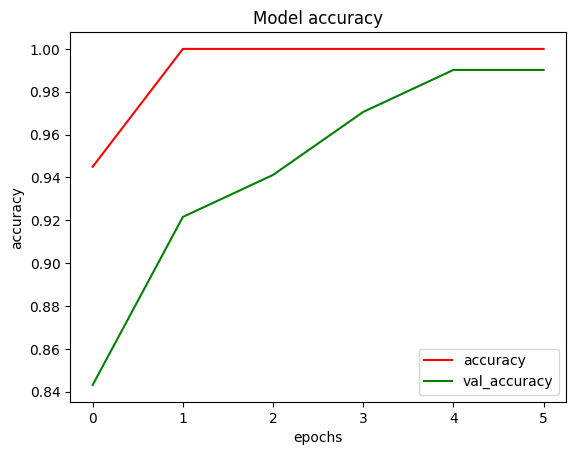

In [ ]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='green')
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

# Test our model on real data

In [ ]:
from google.colab import files
from keras.utils import load_img, img_to_array

Saving man-1835195_640.jpg to man-1835195_640.jpg
1/1 [==============================] - 0s 27ms/step
image is human


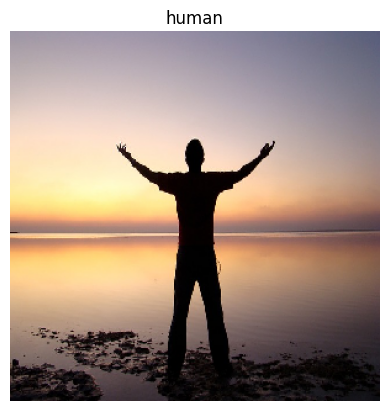

In [ ]:
image_file = files.upload()

path = '/content/' + list(image_file.keys())[0]

image = load_img(path, target_size=(300, 300))
image = img_to_array(image)
image /= 255
image = np.expand_dims(image, axis=0)

prediction = model.predict(image)

if prediction[0] > 0.5:
  print('image is human')
  plt.imshow(image.reshape((300, 300, 3)))
  plt.title('human')
  plt.axis('off')
  plt.show()
else:
  print('image is horse')
  plt.imshow(image.reshape((300, 300, 3)))
  plt.title('horse')
  plt.axis('off')
  plt.show()

